In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import json
import pandas as pd
import seaborn as sns

In [3]:
def check_file(file, scenarios, all=False):
    res = False
    for scenario in scenarios:
        if scenario in file:
            res = True
    return res or all

In [4]:
scenarios = ["centerLeft0.8","random0.2"]

result_files = glob.glob("../src/dist/output/analysis/*.json")
result_data = []
files = []
for file in result_files:
    if check_file(file, scenarios, all=True):
        with open(file, "r") as f:
            result_data.append(json.load(f))
            files.append(file)
result_files = files

In [5]:
def get_data_by_filenames(filenames):
    result_datas = []
    for filename in filenames:
        filename = "/" +filename+".json"
        for i, f in enumerate(result_files):
            if filename in f:
                result_datas.append(result_data[i])
                break
    return result_datas

In [6]:
def get_node_load_data(simulationData):
    return simulationData["node-load-list"]

In [7]:
def get_user_connection_data(simulationData):
    return simulationData["user-connection-distance-list"]

In [8]:
def get_file_names(scenarios, total_loads, server_funcs, network_funcs):
    file_names = []
    for scenario in scenarios:
        for server_func in server_funcs:
            for network_func in network_funcs:
                for total_load in total_loads:
                    file_names.append(scenario + total_load + "-" + server_func + "-" + network_func)
    return file_names

In [9]:
save_img_path = "./img/"
def save_img(plt, title):
    plt.savefig(save_img_path + title + '.pdf',  bbox_inches='tight')

In [10]:
def plt_config(plt):

    #フォント設定
    plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
    #plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
    plt.rcParams["font.size"] = 20 # 全体のフォントサイズが変更されます。
    plt.rcParams['xtick.labelsize'] = 18 # 軸だけ変更されます。
    plt.rcParams['ytick.labelsize'] = 18 # 軸だけ変更されます
    plt.rcParams['axes.labelsize'] = 25


    #軸設定
    plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
    plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き
    #plt.rcParams['axes.grid'] = True # グリッドの作成
    #plt.rcParams['grid.linestyle']='--' #グリッドの線種
    plt.rcParams["xtick.minor.visible"] = True  #x軸補助目盛りの追加
    plt.rcParams["ytick.minor.visible"] = True  #y軸補助目盛りの追加
    plt.rcParams['xtick.top'] = True  #x軸の上部目盛り
    plt.rcParams['ytick.right'] = True  #y軸の右部目盛り


    #軸大きさ
    #plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
    #plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
    #plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
    #plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
    #plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
    #plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ
    #plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
    #plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
    #plt.rcParams["axes.linewidth"] = 1.0                #囲みの太さ


    #凡例設定
    plt.rcParams["legend.fancybox"] = False  # 丸角OFF
    plt.rcParams["legend.framealpha"] = 0.5  # 透明度の指定、0で塗りつぶしなし
    plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
    plt.rcParams["legend.markerscale"] = 2 #markerサイズの倍率


In [11]:
colors = ["#FF4B00", "#005AFF", "#03AF7A"]

In [12]:
def box_plot(timeStepDataList,serverFuncs, networkFuncs, title="boxplot", xLabel="File Name", yLabel="Value",colors=colors, save=False):
    plt.style.use("default")
    # sns.set_style("whitegrid")
    # sns.set_palette("pastel")
    sns.set(style='whitegrid', palette='deep', font_scale=1.5, color_codes=True, rc=None)


    df_grouped_by_network = []
    df_outlier_grouped_by_network = []

    for i in range(len(timeStepDataList)//len(serverFuncs)):
        df_tmp = pd.DataFrame()
        df_outlier = pd.DataFrame()
        for j in range(len(serverFuncs)):
            index = i  + j * len(serverFuncs)
            timeStepData = timeStepDataList[index]
            df_tmp = pd.concat([df_tmp, pd.DataFrame({serverFuncs[j] : timeStepData})], axis=1)
            df_outlier = pd.concat([df_outlier, pd.DataFrame({serverFuncs[j] : [np.min(timeStepData), np.max(timeStepData)]})], axis=1)
        df_melt  = pd.melt(df_tmp)
        df_melt['network'] = networkFuncs[i]
        df_grouped_by_network.append(df_melt)
        df_outlier_melt  = pd.melt(df_outlier)
        df_outlier_melt['network'] = networkFuncs[i]
        df_outlier_grouped_by_network.append(df_outlier_melt)

    df = pd.concat(df_grouped_by_network, axis=0)
    df_out = pd.concat(df_outlier_grouped_by_network, axis=0)
    df =df.dropna(how="any")
    df_outl =df_out.dropna(how="any")

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    

    # sns.boxplot(x='variable', y='value', data=df, hue='network', palette=colors, ax=ax, whis=[5, 95], showfliers=False)
    sns.boxplot(x='variable', y='value', data=df, hue='network', palette=colors, ax=ax, whis=[5, 95], showfliers=False,
                medianprops=dict(linewidth=2.5))    
    sns.boxplot(x='variable', y='value', data=df_out, hue='network', palette=colors, ax=ax, legend=False, showfliers=True, showcaps=False, showbox=False, whis=False, showmeans=False,medianprops=dict(visible=False))

    # sns.boxenplot(x='variable', y='value', data=df, hue='network', palette='Dark2', ax=ax)

    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    # ax.set_ylim(0, 20)
    ax.legend()


    if save:
        save_img(plt, title)
    plt.show()

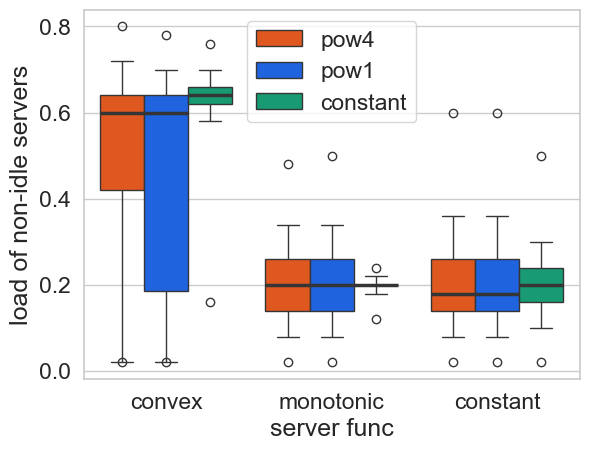

In [13]:
# 負荷の比較
scenario = "random"
total_load= "0.2"
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "pow1", "constant"]
show_files = get_file_names([scenario], [total_load], server_funcs, network_funcs)


data = get_data_by_filenames(show_files)

node_load_list = []

for i,d in enumerate(data): 
    node_load = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        for load in timeStepData:
            if load != 0:
                node_load.append(load)        
    node_load_list.append(node_load)
box_plot(node_load_list, server_funcs, network_funcs, f'{scenario}_{total_load}_load' , "server func", "load of non-idle servers",colors=colors, save=True)

idling_resource_num convex pow4 9.0
idling_resource_num convex pow1 9.0
idling_resource_num convex constant 11.0
idling_resource_num monotonic pow4 0.0
idling_resource_num monotonic pow1 0.0
idling_resource_num monotonic constant 0.0
idling_resource_num constant pow4 0.0
idling_resource_num constant pow1 0.0
idling_resource_num constant constant 0.0


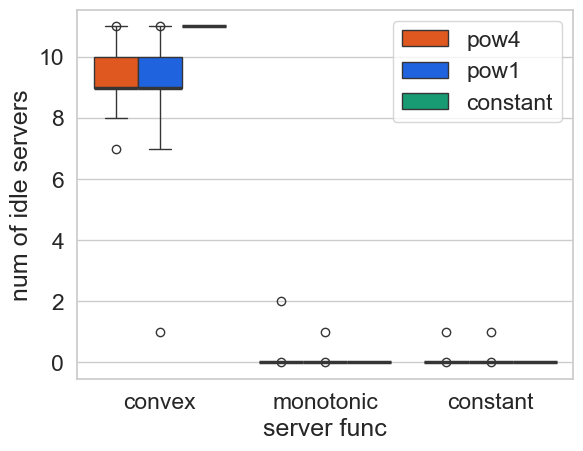

In [14]:
# アイドルリソース数を表示
scenario = "random"
total_load= "0.2"
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "pow1", "constant"]
show_files = get_file_names([scenario], [total_load], server_funcs, network_funcs)


data = get_data_by_filenames(show_files)
idling_resource_num_list = []
for i,d in enumerate(data): 
    idling_resource_num = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        idling_resource_sum = 0
        for load in timeStepData:
            if load == 0:
                idling_resource_sum +=1
        idling_resource_num.append(idling_resource_sum)
    print("idling_resource_num",server_funcs[i//3], network_funcs[i%3] , np.median(idling_resource_num))
    idling_resource_num_list.append(idling_resource_num)

box_plot(idling_resource_num_list, server_funcs, network_funcs, f'{scenario}_{total_load}_idle' , "server func", "num of idle servers",colors, save=True)


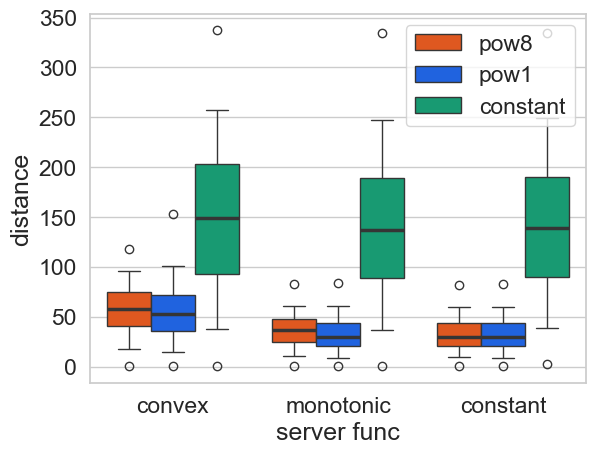

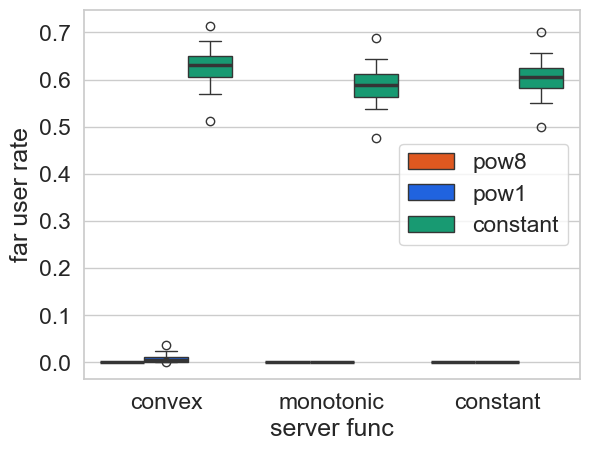

In [15]:
# 割り当て距離の比較
scenario = "random"
total_load= "0.2"
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow8", "pow1", "constant"]
show_files = get_file_names([scenario], [total_load], server_funcs, network_funcs)
data = get_data_by_filenames(show_files)

distance_list = []
far_list = []
for i,d in enumerate(data): 
    distance = []
    far_rate = []
    user_connection_data = d["user-connection-distance-list"]
    threshold = d["network-distance-threshold"]
    for timeStepData in user_connection_data:
        far = 0
        connection_num = 0
        for d in timeStepData:
            if d >= 0:
                connection_num += 1
                distance.append(d)
                if d > threshold:
                    far += 1
        far /= connection_num
        far_rate.append(far)
    distance_list.append(distance)
    far_list.append(far_rate)

box_plot(distance_list, server_funcs, network_funcs, f'{scenario}_{total_load}_distance' , "server func", "distance",colors, save=True)
box_plot(far_list, server_funcs, network_funcs, f'{scenario}_{total_load}_far_rate' , "server func", "far user rate",colors, save=True)

['#FF4B00', '#005AFF', '#03AF7A', '#6495ED', '#659AD2']


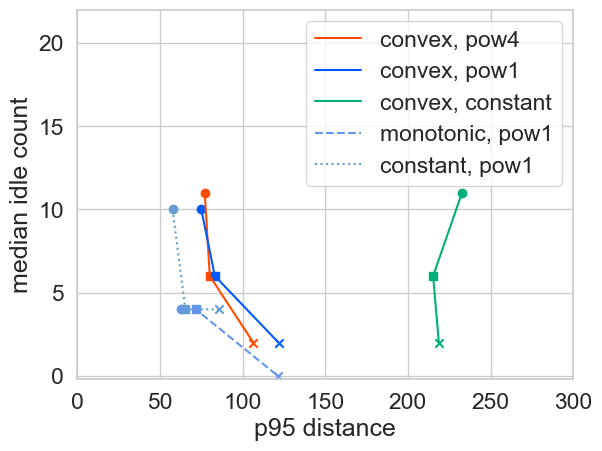

In [16]:
# 手法の比較
scenarios = ["centerLeft"]
total_loads= ["0.2", "0.4", "0.6"]
# total_loads= ["0.2", "0.4"]
server_funcs = ["convex", "monotonic", "constant"]
# server_funcs = ["monotonic"]
network_funcs = ["pow4", "pow1", "constant"]
# network_funcs = ["pow4", "pow1"]
show_files = get_file_names(scenarios,total_loads, server_funcs, network_funcs)


show_data = get_data_by_filenames(show_files)
markers = ["o", "s", "x", "."]
lines = ["-", "--", ":"]
marker_labels = [f"Load = {load}" for load in total_loads]  # 負荷の凡例
colors = ["#FF4B00", "#005AFF", "#03AF7A", "#6495ED","#659AD2"]
print(colors)
tmp = 0
for i, scenario in enumerate(scenarios):
    for j, server_func in enumerate(server_funcs):
        for k, network_func in enumerate(network_funcs):
            if server_func == "monotonic" and network_func == "pow4":
                continue
            if server_func == "monotonic" and network_func == "constant":
                continue
            if server_func == "constant" and network_func == "pow4":
                continue
            if server_func == "constant" and network_func == "constant":
                continue
            load_list = []
            # far_user_rate_list = []
            distance_list = []
            medium_idle_num_list = []

            for l, total_load in enumerate(total_loads):
                index = i * len(server_funcs) * len(network_funcs) * len(total_loads) + j * len(network_funcs) * len(total_loads) + k * len(total_loads) + l
                data = show_data[index]
                node_load_data = get_node_load_data(data)
                distance_data = get_user_connection_data(data)
                threshold = data["network-distance-threshold"]
                idle_nums = []
                loads =[]
                far_user_rate = 0
                distance = []
                for timeStepData in node_load_data:
                    idle_num = 0
                    for load in timeStepData:
                        loads.append(load)
                        if load == 0:
                            idle_num += 1
                    idle_nums.append(idle_num)
                for timeStepData in distance_data:
                    for d in timeStepData:
                        distance.append(d)
                        if d > threshold:
                            far_user_rate += 1
                far_user_rate /= len(distance_data[0])
                far_user_rate /= len(distance_data)
                distance_list.append(np.percentile(distance, 95))
                load_list.append(np.percentile(loads, 95))
                medium_idle_num_list.append(np.median(idle_nums))
                # far_user_rate_list.append(far_user_rate)
                plt.scatter(distance_list[l], medium_idle_num_list[l], color=colors[tmp], marker=markers[l])
            # plt.scatter(far_user_rate_list, ave_idle_num_list, label=f"{server_func}_{network_func}")
            # plt.plot(far_user_rate_list, ave_idle_num_list)
            # plt.scatter(distance_list, ave_idle_num_list)
            # plt.plot(distance_list, load_list, color=colors[tmp],label=f"{server_func}, {network_func}", linestyle=lines[j])
            plt.plot(distance_list, medium_idle_num_list, color=colors[tmp],label=f"{server_func}, {network_func}", linestyle=lines[j])
            if tmp==4:
                plt.legend(ncol=1)

                # for l in range(len(total_loads)):
                    # plt.scatter([], [], color='gray', marker=markers[l], label=marker_labels[l]) 
            tmp+=1

# plt.legend(loc='lower right')
plt.legend()
# plt.legend(loc='lower left', bbox_to_anchor=(1, 0), ncol=1)
# plt.legend(ncol=1)


# plt.xlabel("far user rate")
plt.xlabel("p95 distance")
# plt.ylabel("ave idle count")
plt.ylabel("median idle count")
plt.xlim(0, 300)
plt.ylim(-0.2,22)
# plt.savefig('./img/' + scenarios[0] + 'compare.svg', bbox_inches='tight')
plt.savefig('./img/' + scenarios[0] + 'compare.png', bbox_inches='tight', transparent=True)  # 透明背景のPNG画像として保存
plt.show()
                  